In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os, re, sys, glob
import matplotlib.gridspec

In [2]:
for csv in glob.glob("*.csv"):
	df = pd.read_csv(csv, index_col=0)
	df = df.reset_index(drop=True)
	df.to_csv("tables/" + csv)

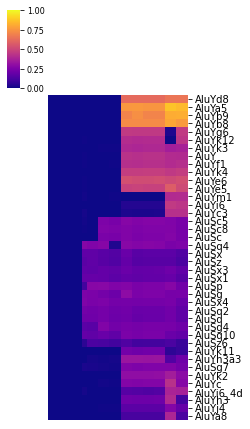

In [3]:
def plot_w_vmax(k, mut, elem, vmax):
	df = pd.read_csv(f"tables/df_muts_{mut}{k}_top25_{elem}.csv", index_col=0)

	column_sums = df.sum()
	nonzero_columns = column_sums[column_sums > 0].index
	df = df[nonzero_columns]
	
	df = df[df.sum().sort_values(ascending=False).index].iloc[:,:40]
	df = df.T
	
	kws = dict(cbar= True, 
			   figsize=(3.5,6))
	g = sns.clustermap(df,
					   cmap="plasma",
					   yticklabels=1,
					   xticklabels=0,
					   col_cluster=True,
					   linewidths=0,
					   vmax=vmax, 
					   **kws)
	g.ax_row_dendrogram.set_visible(False)
	g.ax_col_dendrogram.set_visible(False)
	g.ax_cbar.tick_params(labelsize=8)
	g.ax_heatmap.tick_params(right=True, labelright=True, bottom=False)

	plt.show()
	plt.close()

plot_w_vmax(13, "ins", "sines", 1)